pygame 2.0.1 (SDL 2.0.14, Python 3.6.5)
Hello from the pygame community. https://www.pygame.org/contribute.html
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


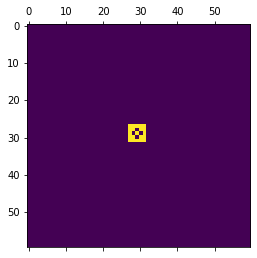

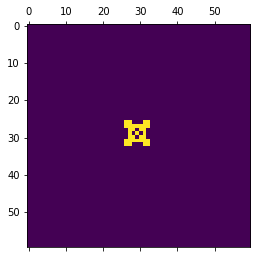

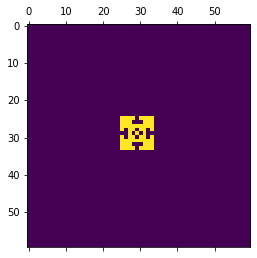

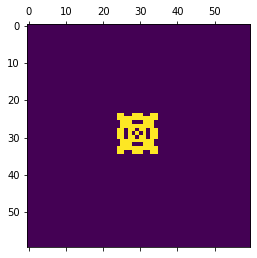

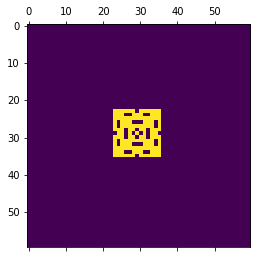

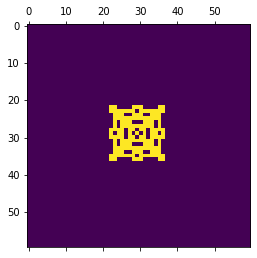

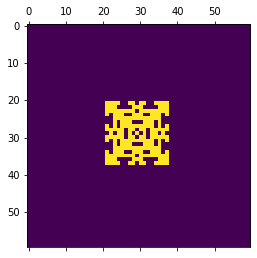

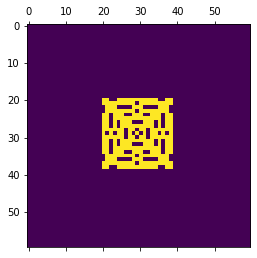

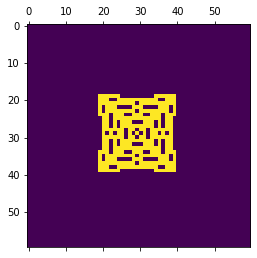

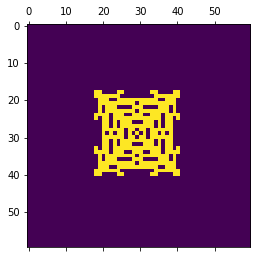

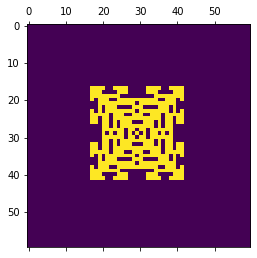

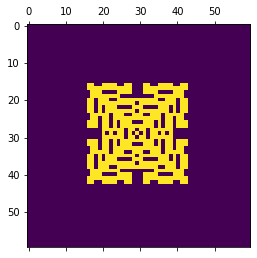

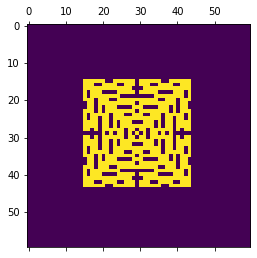

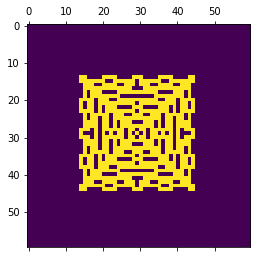

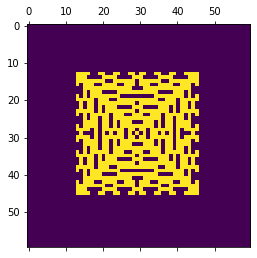

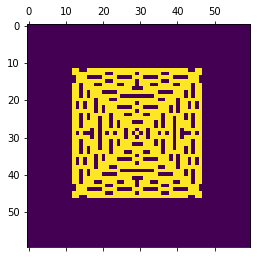

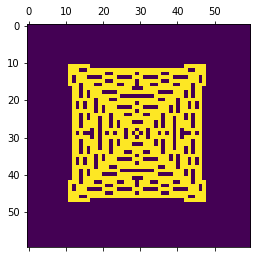

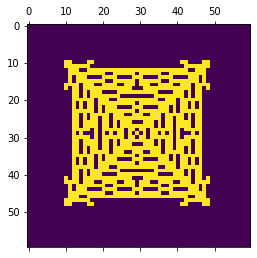

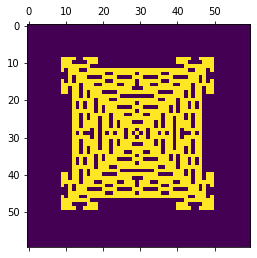

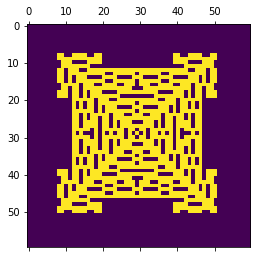

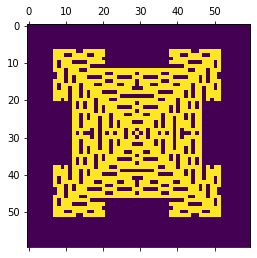

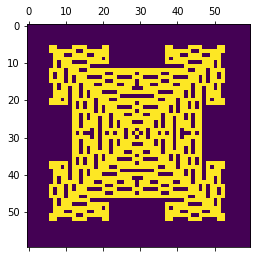

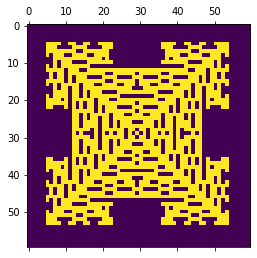

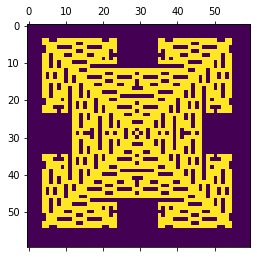

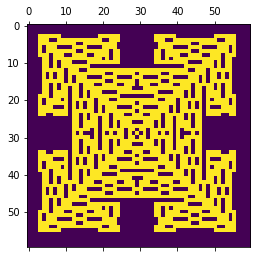

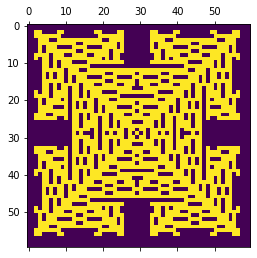

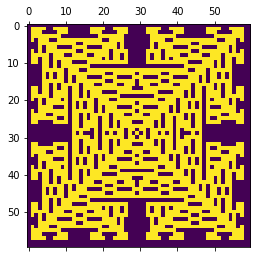

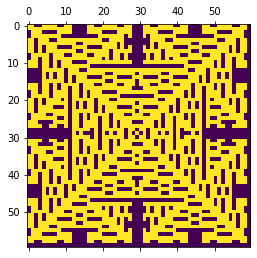

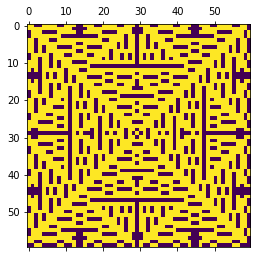

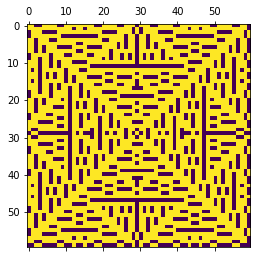

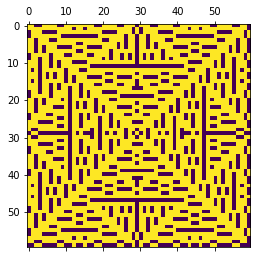

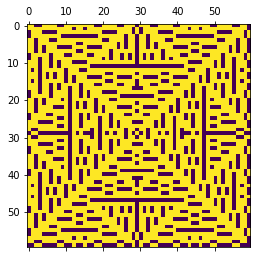

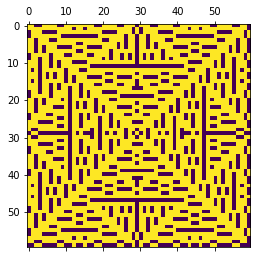

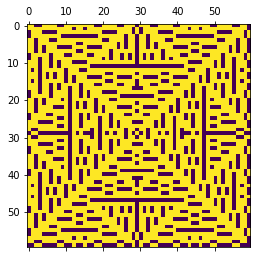

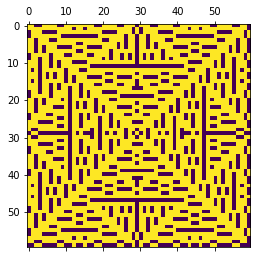

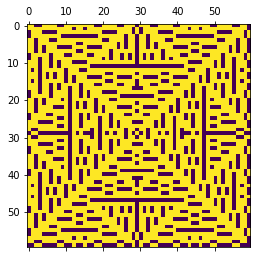

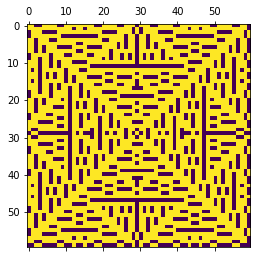

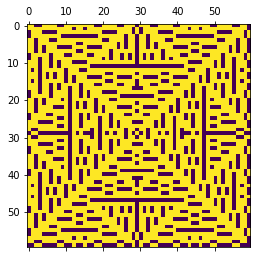

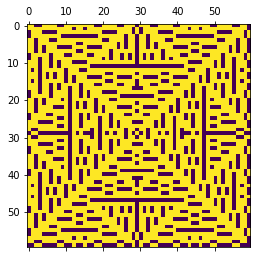

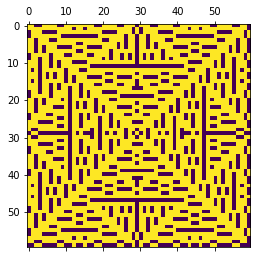

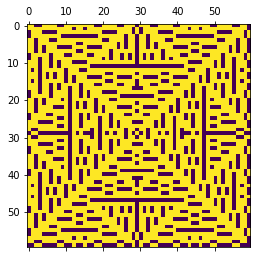

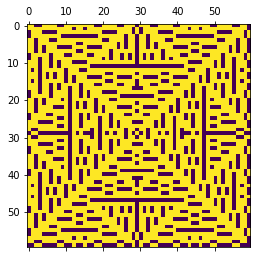

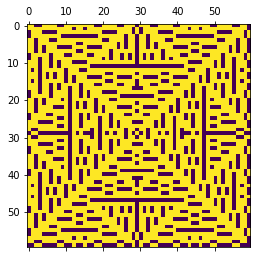

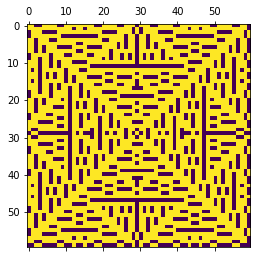

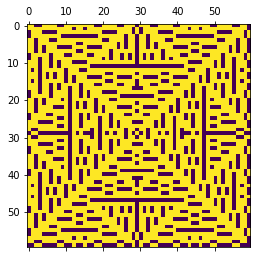

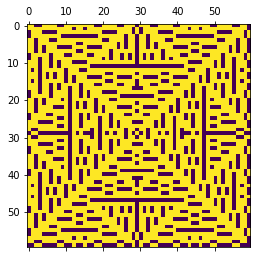

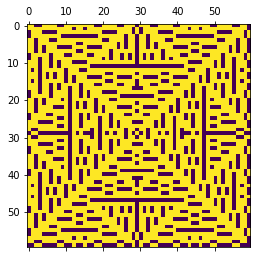

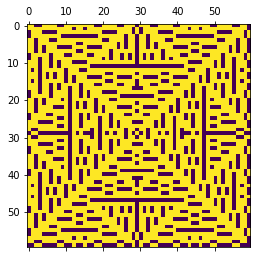

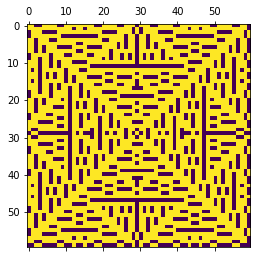

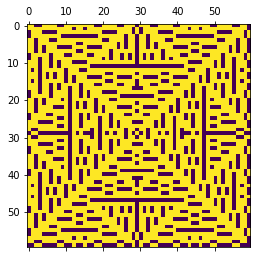

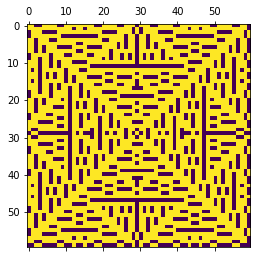

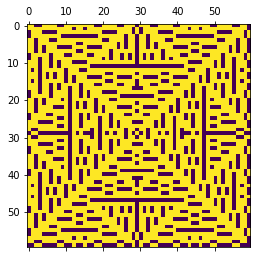

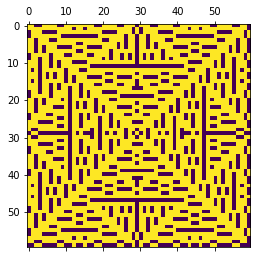

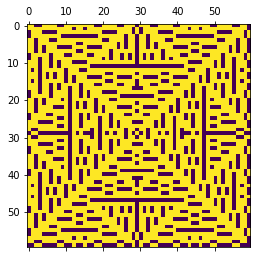

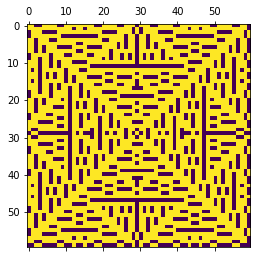

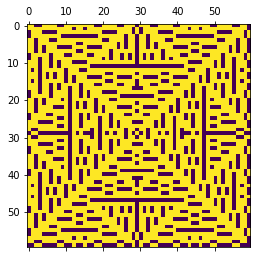

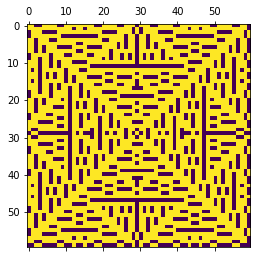

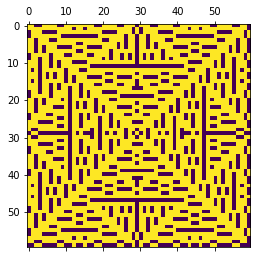

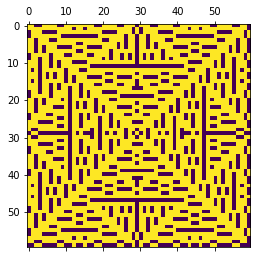

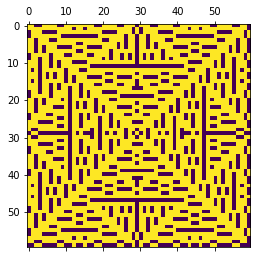

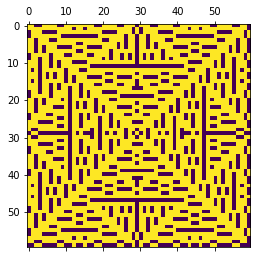

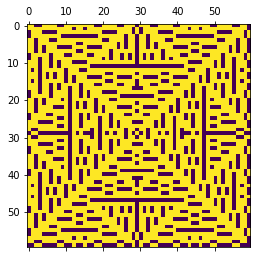

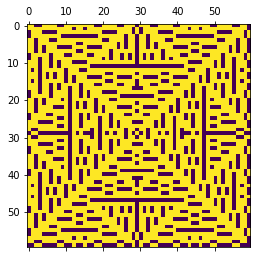

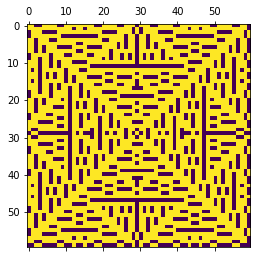

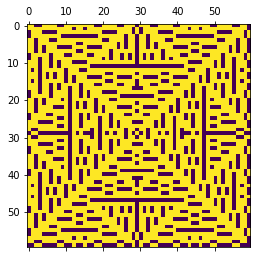

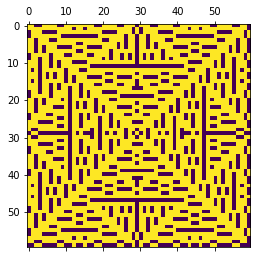

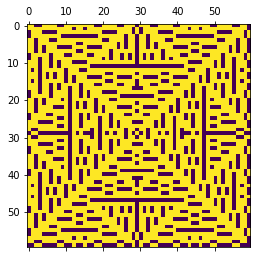

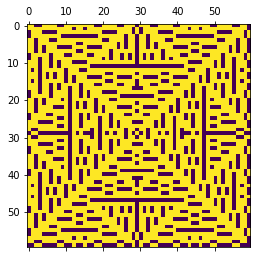

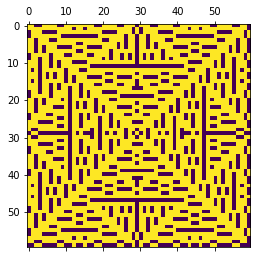

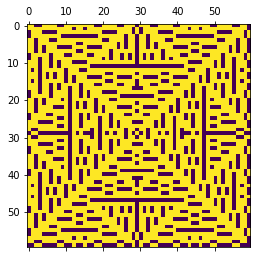

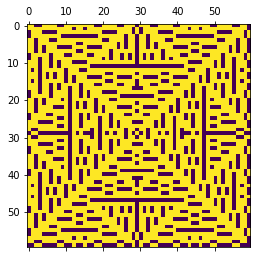

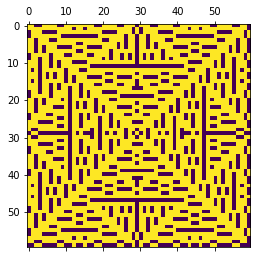

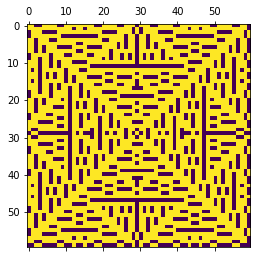

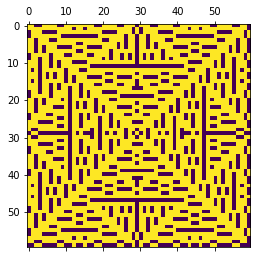

KeyboardInterrupt: 

In [1]:
import sys, pygame
import numpy as np 
import matplotlib.pyplot as plt
import time
pygame.init()

#COMANDOS PARA CREAR LA PANTALLA Y DARLE COLOR
size = width, height = 600, 600

#CREACIÓN DEL NÚMERO DE CÉLULAS EN EL DOMINIO
nX_cells = 60
nY_cells = 60

dimCW = (width - 1)/ nX_cells
dimCH = (height- 1)/ nY_cells

bg = 25, 25, 25

screen = pygame.display.set_mode(size)
screen.fill(bg)

#gameState = np.random.randint(0, 2, (nX_cells, nY_cells))


#***** Primera bandera para saber si esta correcto el código, Se dibuja un palo ******#
#gameState = np.zeros((nX_cells, nY_cells))
#gameState[20,20] = 1
#gameState[20,21] = 1
#gameState[20,22] = 1

#***** Segunda bandera para saber si esta correcto el código, Se dibuja un bicho que camina ******#
gameState = np.zeros((nX_cells, nY_cells))
gameState[29,29] = 1

gameState[28,28] = 1
gameState[30,28] = 1
gameState[28,30] = 1
gameState[30,30] = 1

print(gameState)

#CICLO PARA CREAR LAS CÉLULAS Y EL MALLADO DEL DOMINIO

#SE VA A CONSIDERAR FRONTERAS TOROIDALES ES DECIR LAS FRONTERAS SE VERAN IZQ CON DERECHA Y ARRIBA CON ABAJO


while 1:
    
    pygame.event.pump()
    
    new_gameState = np.copy(gameState)
    screen.fill(bg)
    
    for y in range(0,nY_cells):
        for x in range(0, nX_cells):
            
            #AUTÓMATAS CELULARES BIDIMENSIONALES: Regla de Solidificación
            #1. Si la célula está en estado 1 (activada) entonces permanecerá en estado 1, 
            #   independientemente de los estados de sus vecinas.
            #2. Si la célula está en el estado 0 (inactiva) entonces sumará los estados de las células vecinas. 
            #   Si el número de celdas activadas en su entorno es 1 o 2, entonces la célula actualizará su estado a 1; 
            #   en caso contrario permanecerá desactivada.
           
            
            ######FUNCIÓN PARA VER CUANTOS VECINOS DE [X,Y] ESTAN VIVOS
            
            n_neigh = gameState[(x-1) % nX_cells, (y-1) % nY_cells ] + \
                      gameState[(x) % nX_cells, (y-1) % nY_cells ] + \
                      gameState[(x+1) % nX_cells, (y-1) % nY_cells ] + \
                      gameState[(x-1) % nX_cells, (y) % nY_cells ] + \
                      gameState[(x+1) % nX_cells, (y) % nY_cells ] + \
                      gameState[(x-1) % nX_cells, (y+1) % nY_cells ] + \
                      gameState[(x) % nX_cells, (y+1) % nY_cells ] + \
                      gameState[(x+1) % nX_cells, (y+1) % nY_cells ]
            
            #print(n_neigh)
            
            ######APLICACIÓN DE LAS REGLAS
            
            if gameState[x,y] == 1:
                new_gameState[x,y] = 1
                
            elif gameState[x,y] == 0 and (n_neigh == 1 or n_neigh == 2):
                new_gameState[x,y] = 1
            
            elif gameState[x,y] == 0 and (n_neigh != 1 and n_neigh != 2):
                new_gameState[x,y] = 0
            
            
            poly = [((x)*dimCW,(y)*dimCH),
                   ( (x+1)*dimCW,  (y)*dimCH),
                   ( (x+1)*dimCW,  (y+1)*dimCH),
                   ((x)*dimCW,(y+1)*dimCH)]
            
            pygame.draw.polygon(screen, (255, 255, 255), poly, int(abs(1-new_gameState[x,y])))
            
            #plt.matshow(gameState)
            #plt.show() 
            

    gameState = new_gameState
    time.sleep(0.5)
    
    plt.matshow(gameState)
    plt.show()         
    
    
            #rect = pygame.rect.Rect((64, 54, 16, 16))
            
    
    pygame.display.flip()